# OpenSMILE Analysis
This notebook loads OpenSMILE csv- data, cleans and plots it

## Import relevant libraries

In [14]:
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
import nltk
import scipy.stats as st
import Helper as hp

## Load .csv data with results of OpenSMILE Analysis
First we load .csv data and clean it (removing of NaNs), then we store information of all files in seperate panda dataframes containing information about affect, emotion and valence/arousal for all participants.

In [2]:
# Get Filenames to iterate
filenames = listdir('C:\\Users\\user\\OpenSMILE_Data')

#Create python lists which store results
arousal = []
valence = []
emotion = []
affect = []
loi = []
characterIDs = []

fnames = []
for x in filenames:
    fnames.append([x])    
    
emotion_label = ['anger', 'boredom', 'disgust', 'fear', 'happiness', 'neutral', 'sadness']
affect_label = ['aggressiv', 'cheerful', 'intoxicated', 'nervous', 'neutral', 'tired']
loi_label = ['disinterest', 'normal', 'high interest']

for i in range(len(fnames)):
     # data contains all information (arousal, valence, emotion, affect) and we want to save the values of all files in a list
    data = pd.read_csv("OpenSMILE_Data/" + filenames[i])    

    # For arousal, valence and affect we have to drop nans, since they have less values than emotion
    temp_arousal = data['arousal']
    temp_arousal = temp_arousal.dropna()
    temp_valence = data['valence'] 
    temp_valence = temp_valence.dropna()
    temp_affect = data['abcAffect']
    temp_affect = temp_affect.dropna()
    temp_emotion = data['emodbEmotion']
    temp_loi = data['avicLoI']
    temp_loi = temp_loi.dropna()
    characterIDs.append(fnames[i][0][0])
    
    #Append the temp values to 'global lists'
    emotion.append(temp_emotion.values.tolist())
    affect.append(temp_affect.values.tolist())
    valence.append(temp_valence.values)
    arousal.append(temp_arousal.values)
    loi.append(temp_loi.values)

#We want to have the labels as column seperators and the filenames as ID 
#We want to do this, so that if we add more files (at the moment only 6 .csv files are loaded) we want to add rows and not columns
#If we plot the data, emotion_label can be used as label
df_emotion = pd.DataFrame.from_records(emotion)
df_emotion.columns = emotion_label
df_emotion['CharacterID'] = characterIDs
df_emotion['file'] = filenames

#Now do the same for affect
df_affect = pd.DataFrame.from_records(affect)
df_affect.columns = affect_label
df_affect['CharacterID'] = characterIDs
df_affect['file'] = filenames

#Now for loi
df_loi = pd.DataFrame.from_records(loi)
df_loi.columns = loi_label
df_loi['CharacterID'] = characterIDs
df_loi['file'] = filenames

#For Arousal and Valence, we want to combine these two features so that we can draw a scatter plot in the arousal valence space
np_ar = np.array(arousal).ravel()
np_val = np.array(valence).ravel()
np_ar_val = np.array([np_ar, np_val])

#Transpose Matrix so that it is in the same form as affect and emotion (columns = arousal, valence, ID = Filename)
df_ar_val = pd.DataFrame.from_records(np_ar_val.T)
#df_ar_val.index = filenames
df_ar_val.columns = ['valence', 'arousal']
df_ar_val['CharacterID'] = characterIDs
df_ar_val['file'] = filenames
df_loi

,disinterest,normal,high interest,CharacterID,file
0,0.007110,0.866455,0.126435,0,0_a.csv
1,0.011291,0.180537,0.808171,0,0_b.csv
2,0.102650,0.176900,0.720450,1,1_a.csv
3,0.007519,0.595941,0.396541,1,1_b.csv
4,0.004722,0.966718,0.028559,2,2_a.csv
5,0.014821,0.948399,0.036780,2,2_b.csv



## Now that we have our Panda Dataframes we can go ahead and have a look at the data by plotting it

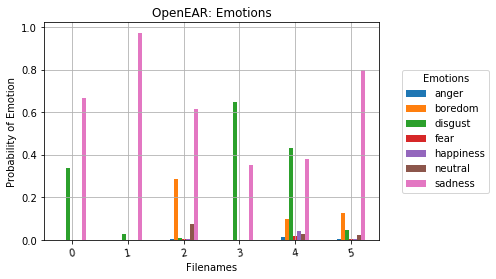

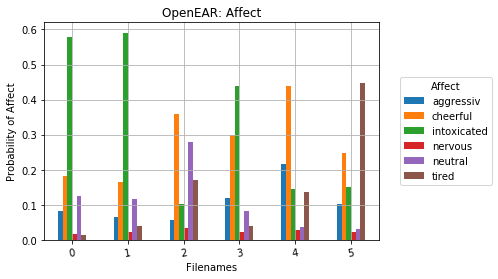

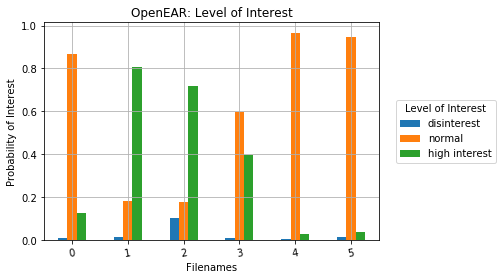

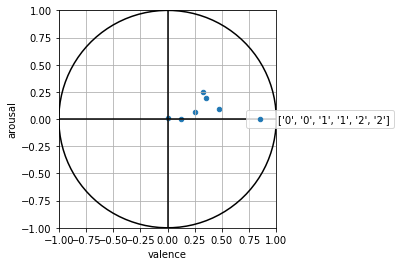

In [3]:
# Start with Emotion
ax_emo = df_emotion.plot.bar(title = 'OpenEAR: Emotions', rot = 10) #We set rotation to 10 so that the filenames can be read
ax_emo.legend(loc = 'center', bbox_to_anchor=(1.2,0.5), title = 'Emotions')
ax_emo.set_ylabel('Probability of Emotion')
ax_emo.set_xlabel('Filenames')
plt.grid(True)

#Same for Affect
ax_aff = df_affect.plot.bar(title = 'OpenEAR: Affect', rot = 10)
ax_aff.legend(loc = 'center', bbox_to_anchor=(1.2,0.5), title = 'Affect')
ax_aff.set_ylabel('Probability of Affect')
ax_aff.set_xlabel('Filenames')
plt.grid(True)

#And same for Level of Interest
ax_loi = df_loi.plot.bar(title = 'OpenEAR: Level of Interest', rot = 10)
ax_loi.legend(loc = 'center', bbox_to_anchor=(1.2,0.5), title = 'Level of Interest')
ax_loi.set_ylabel('Probability of Interest')
ax_loi.set_xlabel('Filenames')
plt.grid(True)

#Now plot Arousal-Valence data in arousal valence space

#Try to get the legen to display the filenames (Not working yet)
fnames = []
for x in filenames:
    fnames.append([x])
    
ax_ar_val = df_ar_val.plot.scatter(x = 'valence', y = 'arousal', label = characterIDs)

#We want to plot the arousal valence circle so we create values for it
t = np.linspace(0,np.pi*2,100)
ax_ar_val.plot(np.cos(t), np.sin(t), linewidth = 1.5, color = 'black')
ax_ar_val.axvline(0,0,1, c = 'black')
x_coord = [-1.0,1.0]
y_coord = [0.0,0.0]
ax_ar_val.plot(x_coord, y_coord, c = 'black')

#Make Plot pretty
ax_ar_val.legend(loc = 'center', bbox_to_anchor=(1.2,0.5))
plt.grid(True)
plt.xlim(-1.0, 1.0)
plt.ylim(-1.0, 1.0)
ax_ar_val.set_aspect('equal')
plt.locator_params(axis='x',nbins= 9)


## Let's load information about the speakers
The speaker ID is saved in a single .csv file containing four important columns: ID, Age, Sex and Acadedmic Status. Since before loaded OpenSMILE csv files are named using the corresponding index (ex. speaker with id 0 has two files 0_a.csv and 0_b.csv), so that a link can be created

In [4]:
char_data = pd.read_csv("CharacterData/CharacterIDs.csv")    

#Join above tables and Character Tables

#To Join DataFrames we have to cast the column on which we want to join to int, so that both columns have the same data type
char_data['CharacterID'] = char_data['CharacterID'].astype(int)
df_ar_val['CharacterID'] = df_ar_val['CharacterID'].astype(int)
df_emotion['CharacterID'] = df_emotion['CharacterID'].astype(int)
df_affect['CharacterID'] = df_affect['CharacterID'].astype(int)
df_loi['CharacterID'] = df_loi['CharacterID'].astype(int)

#Safe new data frames
df_ar_val_char = df_ar_val.merge(char_data, how = 'left', left_on='CharacterID', right_on='CharacterID')
df_emotion_char = df_emotion.merge(char_data, how = 'left', left_on='CharacterID', right_on= 'CharacterID')
df_affect_char = df_affect.merge(char_data, how = 'left', left_on='CharacterID', right_on= 'CharacterID')
df_loi_char = df_loi.merge(char_data, how = 'left', left_on='CharacterID', right_on= 'CharacterID')
df_loi_char

,disinterest,normal,high interest,CharacterID,file,Age,Sex,Academic Status
0,0.007110,0.866455,0.126435,0,0_a.csv,25,0,1
1,0.011291,0.180537,0.808171,0,0_b.csv,25,0,1
2,0.102650,0.176900,0.720450,1,1_a.csv,24,1,1
3,0.007519,0.595941,0.396541,1,1_b.csv,24,1,1
4,0.004722,0.966718,0.028559,2,2_a.csv,23,0,0
5,0.014821,0.948399,0.036780,2,2_b.csv,23,0,0


## Now let's have another look at the plots using the character data
### Let's take a look at female/male

      anger   boredom   disgust      fear  happiness   neutral   sadness  \
0  0.000032  0.000016  0.335981  0.000006   0.000055  0.000004  0.663906   
1  0.000007  0.000006  0.027346  0.000001   0.000007  0.000002  0.972631   
4  0.011395  0.096986  0.430936  0.015841   0.040590  0.026126  0.378125   
5  0.003401  0.126636  0.044417  0.002693   0.004660  0.021114  0.797079   

   CharacterID     file  Age  Sex  Academic Status  
0            0  0_a.csv   25    0                1  
1            0  0_b.csv   25    0                1  
4            2  2_a.csv   23    0                0  
5            2  2_b.csv   23    0                0  


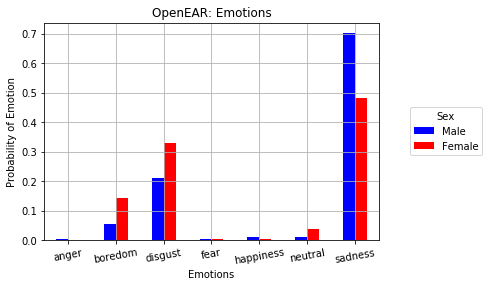

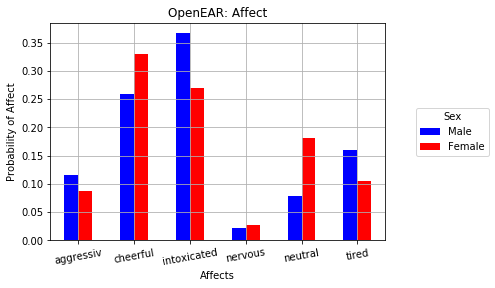

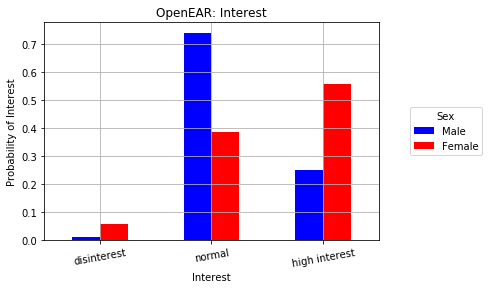

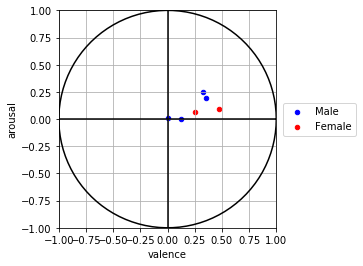

In [17]:
df_ar_val_male = df_ar_val_char.loc[df_ar_val_char['Sex'] == 0]
df_ar_val_female = df_ar_val_char.loc[df_ar_val_char['Sex'] == 1]

df_emotion_char_male = df_emotion_char.loc[df_emotion_char['Sex'] == 0]
df_emotion_char_female = df_emotion_char.loc[df_emotion_char['Sex'] == 1]

df_affect_char_male = df_affect_char.loc[df_affect_char['Sex'] == 0]
df_affect_char_female = df_affect_char.loc[df_affect_char['Sex'] == 1]

df_loi_char_male = df_loi_char.loc[df_loi_char['Sex'] == 0]
df_loi_char_female = df_loi_char.loc[df_loi_char['Sex'] == 1]

#For Plotting, lets calculate the mean emotion value for all audiofiles
df_emotion_char_male = df_emotion_char_male.drop(['CharacterID','file', 'Age', 'Sex', 'Academic Status'], axis = 1)
df_emotion_char_male = df_emotion_char_male.mean()
df_emotion_char_female = df_emotion_char_female.drop(['CharacterID','file', 'Age', 'Sex', 'Academic Status'], axis = 1)
df_emotion_char_female = df_emotion_char_female.mean()
df_emo_sex = pd.DataFrame({'Male': df_emotion_char_male, 'Female': df_emotion_char_female}, index = emotion_label)

#And do the same for affect
df_affect_char_male = df_affect_char_male.drop(['CharacterID','file', 'Age', 'Sex', 'Academic Status'], axis = 1)
df_affect_char_male = df_affect_char_male.mean()
df_affect_char_female = df_affect_char_female.drop(['CharacterID','file', 'Age', 'Sex', 'Academic Status'], axis = 1)
df_affect_char_female = df_affect_char_female.mean()
df_aff_sex = pd.DataFrame({'Male': df_affect_char_male, 'Female': df_affect_char_female}, index = affect_label)

#And for Level of Interest
df_loi_char_male = df_loi_char_male.drop(['CharacterID','file', 'Age', 'Sex', 'Academic Status'], axis = 1)
df_loi_char_male = df_loi_char_male.mean()
df_loi_char_female = df_loi_char_female.drop(['CharacterID','file', 'Age', 'Sex', 'Academic Status'], axis = 1)
df_loi_char_female = df_loi_char_female.mean()
df_loi_sex = pd.DataFrame({'Male': df_loi_char_male, 'Female': df_loi_char_female}, index = loi_label)

# Start with Emotion
ax_emo = df_emo_sex.plot.bar(title = 'OpenEAR: Emotions',rot = 10, color = ['b','r']) #We set rotation to 10 so that the filenames can be read
ax_emo.legend(loc = 'center', bbox_to_anchor=(1.2,0.5), title = 'Sex')
ax_emo.set_ylabel('Probability of Emotion')
ax_emo.set_xlabel('Emotions')
plt.grid(True)

#Now let's plot affect bar diagram
ax_aff = df_aff_sex.plot.bar(title = 'OpenEAR: Affect',rot = 10, color = ['b','r']) #We set rotation to 10 so that the filenames can be read
ax_aff.legend(loc = 'center', bbox_to_anchor=(1.2,0.5), title = 'Sex')
ax_aff.set_ylabel('Probability of Affect')
ax_aff.set_xlabel('Affects')
plt.grid(True)

#Now Level of Interest
ax_loi = df_loi_sex.plot.bar(title = 'OpenEAR: Interest',rot = 10, color = ['b','r']) #We set rotation to 10 so that the filenames can be read
ax_loi.legend(loc = 'center', bbox_to_anchor=(1.2,0.5), title = 'Sex')
ax_loi.set_ylabel('Probability of Interest')
ax_loi.set_xlabel('Interest')
plt.grid(True)

#And finally arousal valence
ax1 = df_ar_val_male.plot.scatter(x = 'valence', y = 'arousal', label = 'Male', c = 'b')
ax2 = df_ar_val_female.plot.scatter(x = 'valence', y = 'arousal', label = 'Female', c = 'r', ax=ax1)
#We want to plot the arousal valence circle so we create values for it
t = np.linspace(0,np.pi*2,100)
ax1.plot(np.cos(t), np.sin(t), linewidth = 1.5, color = 'black')
ax1.axvline(0,0,1, c = 'black')
x_coord = [-1.0,1.0]
y_coord = [0.0,0.0]
ax1.plot(x_coord, y_coord, c = 'black')

#Make Plot pretty
ax1.legend(loc = 'center', bbox_to_anchor=(1.2,0.5))
plt.grid(True)
plt.xlim(-1.0, 1.0)
plt.ylim(-1.0, 1.0)
ax1.set_aspect('equal')
plt.locator_params(axis='x',nbins= 9)

### Let's have look at academic status
Bachelor and Master will be replaced with the to the video corresponding academic status

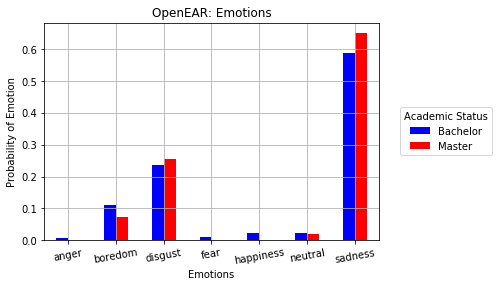

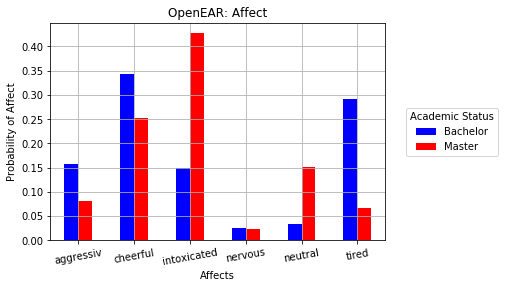

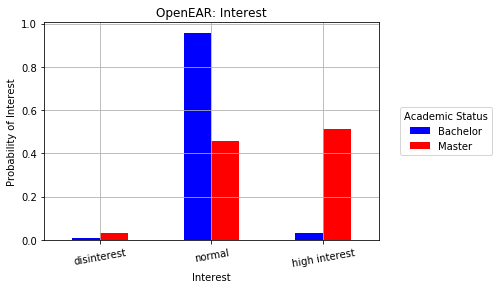

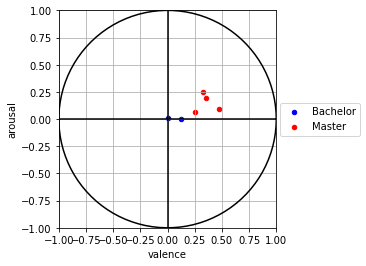

In [6]:
df_ar_val_bachelor = df_ar_val_char.loc[df_ar_val_char['Academic Status'] == 0]
df_ar_val_master = df_ar_val_char.loc[df_ar_val_char['Academic Status'] == 1]

df_emotion_bachelor= df_emotion_char.loc[df_emotion_char['Academic Status'] == 0]
df_emotion_master = df_emotion_char.loc[df_emotion_char['Academic Status'] == 1]

df_affect_bachelor = df_affect_char.loc[df_affect_char['Academic Status'] == 0]
df_affect_master = df_affect_char.loc[df_affect_char['Academic Status'] == 1]

df_loi_bachelor = df_loi_char.loc[df_loi_char['Academic Status'] == 0]
df_loi_master = df_loi_char.loc[df_loi_char['Academic Status'] == 1]

#For Plotting, lets calculate the mean emotion value for all audiofiles
df_emotion_bachelor = df_emotion_bachelor.drop(['CharacterID','file', 'Age', 'Sex', 'Academic Status'], axis = 1)
df_emotion_bachelor = df_emotion_bachelor.mean()
df_emotion_master = df_emotion_master.drop(['CharacterID','file', 'Age', 'Sex', 'Academic Status'], axis = 1)
df_emotion_master = df_emotion_master.mean()
df_emo_aca = pd.DataFrame({'Bachelor': df_emotion_bachelor, 'Master': df_emotion_master}, index = emotion_label)

#And do the same for affect
df_affect_bachelor = df_affect_bachelor.drop(['CharacterID','file', 'Age', 'Sex', 'Academic Status'], axis = 1)
df_affect_bachelor = df_affect_bachelor.mean()
df_affect_master = df_affect_master.drop(['CharacterID','file', 'Age', 'Sex', 'Academic Status'], axis = 1)
df_affect_master = df_affect_master.mean()
df_aff_aca = pd.DataFrame({'Bachelor': df_affect_bachelor, 'Master': df_affect_master}, index = affect_label)

#And now for LoI
df_loi_bachelor = df_loi_bachelor.drop(['CharacterID','file', 'Age', 'Sex', 'Academic Status'], axis = 1)
df_loi_bachelor = df_loi_bachelor.mean()
df_loi_master = df_loi_master.drop(['CharacterID','file', 'Age', 'Sex', 'Academic Status'], axis = 1)
df_loi_master = df_loi_master.mean()
df_loi_aca = pd.DataFrame({'Bachelor': df_loi_bachelor, 'Master': df_loi_master}, index = loi_label)

# Start with Emotion
ax_emo1 = df_emo_aca.plot.bar(title = 'OpenEAR: Emotions',rot = 10, color = ['b','r']) #We set rotation to 10 so that the filenames can be read
ax_emo1.legend(loc = 'center', bbox_to_anchor=(1.2,0.5), title = 'Academic Status')
ax_emo1.set_ylabel('Probability of Emotion')
ax_emo1.set_xlabel('Emotions')
plt.grid(True)

#Now let's plot affect bar diagram
ax_aff1 = df_aff_aca.plot.bar(title = 'OpenEAR: Affect',rot = 10, color = ['b','r']) #We set rotation to 10 so that the filenames can be read
ax_aff1.legend(loc = 'center', bbox_to_anchor=(1.2,0.5), title = 'Academic Status')
ax_aff1.set_ylabel('Probability of Affect')
ax_aff1.set_xlabel('Affects')
plt.grid(True)

#Now plot LoI diagram
ax_loi = df_loi_aca.plot.bar(title = 'OpenEAR: Interest',rot = 10, color = ['b','r']) #We set rotation to 10 so that the filenames can be read
ax_loi.legend(loc = 'center', bbox_to_anchor=(1.2,0.5), title = 'Academic Status')
ax_loi.set_ylabel('Probability of Interest')
ax_loi.set_xlabel('Interest')
plt.grid(True)

ax11 = df_ar_val_bachelor.plot.scatter(x = 'valence', y = 'arousal', label = 'Bachelor', c = 'b')
ax21 = df_ar_val_master.plot.scatter(x = 'valence', y = 'arousal', label = 'Master', c = 'r', ax=ax11)
#We want to plot the arousal valence circle so we create values for it
t = np.linspace(0,np.pi*2,100)
ax11.plot(np.cos(t), np.sin(t), linewidth = 1.5, color = 'black')
ax11.axvline(0,0,1, c = 'black')
x_coord = [-1.0,1.0]
y_coord = [0.0,0.0]
ax11.plot(x_coord, y_coord, c = 'black')

#Make Plot pretty
ax11.legend(loc = 'center', bbox_to_anchor=(1.2,0.5))
plt.grid(True)
plt.xlim(-1.0, 1.0)
plt.ylim(-1.0, 1.0)
ax11.set_aspect('equal')
plt.locator_params(axis='x',nbins= 9)

### Lastly take a look at age
What's now 23,24 and 25 will be replaced by young, middle and old , the age thresholds will be calculated so that each group is distributed

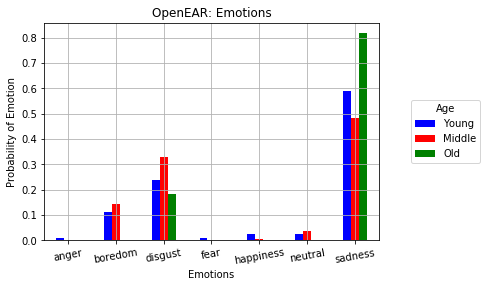

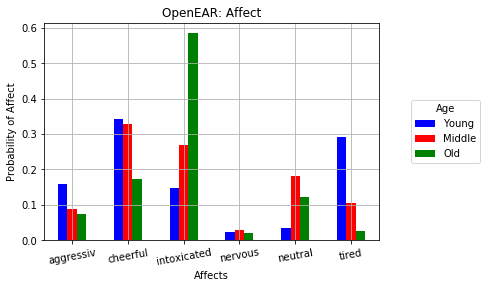

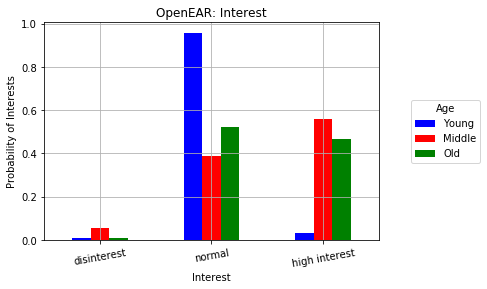

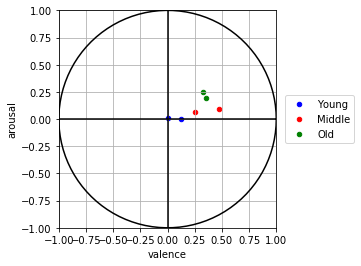

In [7]:
df_ar_val_young = df_ar_val_char.loc[df_ar_val_char['Age'] == 23]
df_ar_val_middle = df_ar_val_char.loc[df_ar_val_char['Age'] == 24]
df_ar_val_old = df_ar_val_char.loc[df_ar_val_char['Age'] == 25]

df_emotion_young= df_emotion_char.loc[df_emotion_char['Age'] == 23]
df_emotion_middle = df_emotion_char.loc[df_emotion_char['Age'] == 24]
df_emotion_old = df_emotion_char.loc[df_emotion_char['Age'] == 25]

df_affect_young = df_affect_char.loc[df_affect_char['Age'] == 23]
df_affect_middle = df_affect_char.loc[df_affect_char['Age'] == 24]
df_affect_old = df_affect_char.loc[df_affect_char['Age'] == 25]

df_loi_young = df_loi_char.loc[df_loi_char['Age'] == 23]
df_loi_middle = df_loi_char.loc[df_loi_char['Age'] == 24]
df_loi_old = df_loi_char.loc[df_loi_char['Age'] == 25]

#For Plotting, lets calculate the mean emotion value for all audiofiles
df_emotion_young = df_emotion_young.drop(['CharacterID','file', 'Age', 'Sex', 'Academic Status'], axis = 1)
df_emotion_young = df_emotion_young.mean()
df_emotion_middle = df_emotion_middle.drop(['CharacterID','file', 'Age', 'Sex', 'Academic Status'], axis = 1)
df_emotion_middle = df_emotion_middle.mean()
df_emotion_old = df_emotion_old.drop(['CharacterID','file', 'Age', 'Sex', 'Academic Status'], axis = 1)
df_emotion_old = df_emotion_old.mean()
df_emo_age = pd.DataFrame({'Young': df_emotion_young, 'Middle': df_emotion_middle, 'Old': df_emotion_old}, index = emotion_label)

#And do the same for affect
df_affect_young = df_affect_young.drop(['CharacterID','file', 'Age', 'Sex', 'Academic Status'], axis = 1)
df_affect_young = df_affect_young.mean()
df_affect_middle = df_affect_middle.drop(['CharacterID','file', 'Age', 'Sex', 'Academic Status'], axis = 1)
df_affect_middle = df_affect_middle.mean()
df_affect_old = df_affect_old.drop(['CharacterID','file', 'Age', 'Sex', 'Academic Status'], axis = 1)
df_affect_old = df_affect_old.mean()
df_aff_age = pd.DataFrame({'Young': df_affect_young, 'Middle': df_affect_middle, 'Old': df_affect_old}, index = affect_label)

#And for LoI
df_loi_young = df_loi_young.drop(['CharacterID','file', 'Age', 'Sex', 'Academic Status'], axis = 1)
df_loi_young = df_loi_young.mean()
df_loi_middle = df_loi_middle.drop(['CharacterID','file', 'Age', 'Sex', 'Academic Status'], axis = 1)
df_loi_middle = df_loi_middle.mean()
df_loi_old = df_loi_old.drop(['CharacterID','file', 'Age', 'Sex', 'Academic Status'], axis = 1)
df_loi_old = df_loi_old.mean()
df_loi_age = pd.DataFrame({'Young': df_loi_young, 'Middle': df_loi_middle, 'Old': df_loi_old}, index = loi_label)

# Start Plotting Emotion
ax_emo2 = df_emo_age.plot.bar(title = 'OpenEAR: Emotions',rot = 10, color = ['b','r', 'g']) #We set rotation to 10 so that the filenames can be read
ax_emo2.legend(loc = 'center', bbox_to_anchor=(1.2,0.5), title = 'Age')
ax_emo2.set_ylabel('Probability of Emotion')
ax_emo2.set_xlabel('Emotions')
plt.grid(True)

#Now let's plot affect bar diagram
ax_aff2 = df_aff_age.plot.bar(title = 'OpenEAR: Affect',rot = 10, color = ['b','r', 'g']) #We set rotation to 10 so that the filenames can be read
ax_aff2.legend(loc = 'center', bbox_to_anchor=(1.2,0.5), title = 'Age')
ax_aff2.set_ylabel('Probability of Affect')
ax_aff2.set_xlabel('Affects')
plt.grid(True)

#And Level of Interest
ax_loi = df_loi_age.plot.bar(title = 'OpenEAR: Interest',rot = 10, color = ['b','r', 'g']) #We set rotation to 10 so that the filenames can be read
ax_loi.legend(loc = 'center', bbox_to_anchor=(1.2,0.5), title = 'Age')
ax_loi.set_ylabel('Probability of Interests')
ax_loi.set_xlabel('Interest')
plt.grid(True)

ax200 = df_ar_val_young.plot.scatter(x = 'valence', y = 'arousal', label = 'Young', c = 'b')
ax201 = df_ar_val_middle.plot.scatter(x = 'valence', y = 'arousal', label = 'Middle', c = 'r', ax=ax200)
ax202 = df_ar_val_old.plot.scatter(x = 'valence', y = 'arousal', label = 'Old', c = 'g', ax=ax200)
#We want to plot the arousal valence circle so we create values for it
t = np.linspace(0,np.pi*2,100)
ax200.plot(np.cos(t), np.sin(t), linewidth = 1.5, color = 'black')
ax200.axvline(0,0,1, c = 'black')
x_coord = [-1.0,1.0]
y_coord = [0.0,0.0]
ax200.plot(x_coord, y_coord, c = 'black')

#Make Plot pretty
ax200.legend(loc = 'center', bbox_to_anchor=(1.2,0.5))
plt.grid(True)
plt.xlim(-1.0, 1.0)
plt.ylim(-1.0, 1.0)
ax200.set_aspect('equal')
plt.locator_params(axis='x',nbins= 9)

## Now have a look at correlation
### Have a look at arousal and what it corrlates with

In [8]:
#'Clean' our dataFrames so that we can call the panda .corr function (default is spearman)
#Let's start with arousal and look how correlation is between emotions
print('Emotions and Arousal')
corr_ar_e_anger = hp.correlation(df_ar_val['arousal'],df_emotion['anger'])
coh_d_ar_e_anger = hp.cohen_d(df_ar_val['arousal'], df_emotion['anger'])

corr_ar_e_boredom = hp.correlation(df_ar_val['arousal'], df_emotion['boredom'])
coh_d_ar_e_bordedom = hp.cohen_d(df_ar_val['arousal'], df_emotion['boredom'])

corr_ar_e_disgust = hp.correlation(df_ar_val['arousal'], df_emotion['disgust'])
coh_d_ar_e_disgust = hp.cohen_d(df_ar_val['arousal'], df_emotion['disgust'])
corr_ar_e_fear = hp.correlation(df_ar_val['arousal'], df_emotion['fear'])
coh_ar_e_fear = hp.cohen_d(df_ar_val['arousal'], df_emotion['fear'])
corr_ar_e_happy = hp.correlation(df_ar_val['arousal'], df_emotion['happiness'])
coh_ar_e_happy = hp.cohen_d(df_ar_val['arousal'], df_emotion['happiness'])
corr_ar_e_neutral = hp.correlation(df_ar_val['arousal'], df_emotion['neutral'])
coh_ar_e_neutral = hp.cohen_d(df_ar_val['arousal'], df_emotion['neutral'])
corr_ar_e_sad = hp.correlation(df_ar_val['arousal'], df_emotion['sadness'])
coh_ar_e_sad = hp.cohen_d(df_ar_val['arousal'], df_emotion['sadness'])

# Now arousal and affect
print('Affect and Arousal')
corr_ar_a_aggressiv = hp.correlation(df_ar_val['arousal'],df_affect['aggressiv'])
coh_d_ar_a_aggressiv = hp.cohen_d(df_ar_val['arousal'],df_affect['aggressiv'])
corr_ar_a_cheerful = hp.correlation(df_ar_val['arousal'], df_affect['cheerful'])
coh_d_ar_a_cheerful = hp.cohen_d(df_ar_val['arousal'],df_affect['cheerful'])
corr_ar_a_intoxicated = hp.correlation(df_ar_val['arousal'], df_affect['intoxicated'])
coh_d_ar_a_intoxicated = hp.cohen_d(df_ar_val['arousal'],df_affect['intoxicated'])
corr_ar_a_nervous = hp.correlation(df_ar_val['arousal'], df_affect['nervous'])
coh_d_ar_a_nervous = hp.cohen_d(df_ar_val['arousal'],df_affect['nervous'])
corr_ar_a_neutral = hp.correlation(df_ar_val['arousal'], df_affect['neutral'])
coh_d_ar_a_neutral = hp.cohen_d(df_ar_val['arousal'],df_affect['neutral'])
corr_ar_a_tired = hp.correlation(df_ar_val['arousal'],df_affect['tired'])
coh_d_ar_a_tired = hp.cohen_d(df_ar_val['arousal'],df_affect['tired'])


# Now arousal and level of Interest
print('Level of Interest and Arousal')
corr_ar_loi1 = hp.correlation(df_ar_val['arousal'], df_loi['disinterest'])
coh_d_ar_loi1 = hp.cohen_d(df_ar_val['arousal'], df_loi['disinterest'])
corr_ar_loi2 = hp.correlation(df_ar_val['arousal'], df_loi['normal'])
coh_d_ar_loi2 = hp.cohen_d(df_ar_val['arousal'], df_loi['normal'])
corr_ar_loi3 = hp.correlation(df_ar_val['arousal'], df_loi['high interest'])
coh_d_ar_loi3 = hp.cohen_d(df_ar_val['arousal'], df_loi['high interest'])

Emotions and Arousal
Correlation between arousal and anger: -0.6834858044692085
Cohen d: 1.3540103907062906
Correlation between arousal and boredom: -0.42307029758274
Cohen d: 0.1583736511748122
Correlation between arousal and disgust: -0.15806251433006668
Cohen d: -0.7373572423651821
Correlation between arousal and fear: -0.6184722018376901
Cohen d: 1.3418849887875337
Correlation between arousal and happiness: -0.5789869405166657
Cohen d: 1.2675246862010017
Correlation between arousal and neutral: -0.356264634376464
Cohen d: 1.073710483184311
Correlation between arousal and sadness: 0.483425559781051
Cohen d: -2.861793647848958
Affect and Arousal
Correlation between arousal and aggressiv: -0.6249619461578844
Cohen d: -0.05694323448409338
Correlation between arousal and cheerful: -0.7547280735964071
Cohen d: -1.7333878080657694
Correlation between arousal and intoxicated: 0.8192158568074172
Cohen d: -1.3141756512058569
Correlation between arousal and nervous: -0.4817454038193749
Cohen 

### Now look at valence

In [9]:
print('Emotions and valence')
corr_val_e_anger = hp.correlation(df_ar_val['valence'], df_emotion['anger'])
coh_d_val_e_anger = hp.cohen_d(df_ar_val['valence'], df_emotion['anger'])
corr_val_e_boredom = hp.correlation(df_ar_val['valence'], df_emotion['boredom'])
coh_d_val_e_boredom = hp.cohen_d(df_ar_val['valence'], df_emotion['boredom'])
corr_val_e_disgust = hp.correlation(df_ar_val['valence'], df_emotion['disgust'])
coh_d_val_e_disgust = hp.cohen_d(df_ar_val['valence'], df_emotion['disgust'])
corr_val_e_fear = hp.correlation(df_ar_val['valence'], df_emotion['fear'])
coh_d_val_e_fear = hp.cohen_d(df_ar_val['valence'], df_emotion['fear'])
corr_val_e_happy = hp.correlation(df_ar_val['valence'], df_emotion['happiness'])
coh_d_val_e_happy = hp.cohen_d(df_ar_val['valence'], df_emotion['happiness'])
corr_val_e_neutral = hp.correlation(df_ar_val['valence'], df_emotion['neutral'])
coh_d_val_e_neutral = hp.cohen_d(df_ar_val['valence'], df_emotion['neutral'])
corr_val_e_sad = hp.correlation(df_ar_val['valence'], df_emotion['sadness'])
coh_d_val_e_sad = hp.cohen_d(df_ar_val['valence'], df_emotion['sadness'])

# Now valence and affect
print('Affect and valence')
corr_val_a_aggressiv = hp.correlation(df_ar_val['valence'], df_affect['aggressiv'])
coh_val_a_aggressiv = hp.cohen_d(df_ar_val['valence'], df_affect['aggressiv'])
corr_val_a_cheerful = hp.correlation(df_ar_val['valence'], df_affect['cheerful'])
coh_val_a_cheerful = hp.cohen_d(df_ar_val['valence'], df_affect['cheerful'])
corr_val_a_intoxicated = hp.correlation(df_ar_val['valence'],df_affect['intoxicated'])
coh_val_a_intoxicated= hp.cohen_d(df_ar_val['valence'], df_affect['intoxicated'])
corr_val_a_nervous = hp.correlation(df_ar_val['valence'],df_affect['nervous'])
coh_val_a_nervous = hp.cohen_d(df_ar_val['valence'], df_affect['nervous'])
corr_val_a_neutral = hp.correlation(df_ar_val['valence'],df_affect['neutral'])
coh_val_a_neutral = hp.cohen_d(df_ar_val['valence'], df_affect['neutral'])
corr_val_a_tired = hp.correlation(df_ar_val['valence'], df_affect['tired'])
coh_val_a_tired = hp.cohen_d(df_ar_val['valence'], df_affect['tired'])

# Now arousal and level of Interest
print('Level of Interest and valence')
corr_val_loi1 = hp.correlation(df_ar_val['valence'], df_loi['disinterest'])
coh_d_val_loi1 = hp.cohen_d(df_ar_val['valence'], df_loi['disinterest'])
corr_val_loi2 = hp.correlation(df_ar_val['valence'], df_loi['normal'])
coh_d_val_loi2 = hp.cohen_d(df_ar_val['valence'], df_loi['normal'])
corr_val_loi3 = hp.correlation(df_ar_val['valence'], df_loi['high interest'])
coh_d_val_loi3 = hp.cohen_d(df_ar_val['valence'], df_loi['high interest'])

Emotions and valence
Correlation between valence and anger: -0.42700028268595
Cohen d: 2.124212618215266
Correlation between valence and boredom: 0.16831427339329016
Cohen d: 1.198707389958022
Correlation between valence and disgust: -0.17965790687690897
Cohen d: 0.03344577381746021
Correlation between valence and fear: -0.3312140972517545
Cohen d: 2.1168342579669335
Correlation between valence and happiness: -0.3991203323202824
Cohen d: 2.071387756958357
Correlation between valence and neutral: 0.2970377418952006
Cohen d: 1.9499189451425651
Correlation between valence and sadness: 0.12493730716157896
Cohen d: -1.7990379478117744
Affect and valence
Correlation between valence and aggressiv: -0.5966541351575038
Cohen d: 1.1899909839878873
Correlation between valence and cheerful: -0.16359981081171018
Cohen d: -0.18032792829621663
Correlation between valence and intoxicated: 0.3355725268618499
Cohen d: -0.38644640823664206
Correlation between valence and nervous: 0.27861337746066017
Cohe

### Now look at the different emotions and how they correlate with affect and level of interest

In [10]:
# Now emotion and affect
print('ANGER')
print('Affect and anger')
corr_ang_a_aggressiv = hp.correlation(df_emotion['anger'],df_affect['aggressiv'])
coh_d_ang_a_aggressiv = hp.cohen_d(df_emotion['anger'],df_affect['aggressiv'])
corr_ang_a_cheerful = hp.correlation(df_emotion['anger'], df_affect['cheerful'])
coh_d_ang_a_cheerful = hp.cohen_d(df_emotion['anger'],df_affect['cheerful'])
corr_ang_a_intoxicated = hp.correlation(df_emotion['anger'], df_affect['intoxicated'])
coh_d_ang_a_intoxicated = hp.cohen_d(df_emotion['anger'],df_affect['intoxicated'])
corr_ang_a_nervous = hp.correlation(df_emotion['anger'], df_affect['nervous'])
coh_d_ang_a_nervous = hp.cohen_d(df_emotion['anger'],df_affect['nervous'])
corr_ang_a_neutral = hp.correlation(df_emotion['anger'], df_affect['neutral'])
coh_d_ang_a_neutral = hp.cohen_d(df_emotion['anger'],df_affect['neutral'])
corr_ang_a_tired = hp.correlation(df_emotion['anger'], df_affect['tired'])
coh_d_ang_a_tired = hp.cohen_d(df_emotion['anger'],df_affect['tired'])

# Now arousal and level of Interest
print('Level of Interest and anger')
corr_ang_loi1 = hp.correlation(df_emotion['anger'], df_loi['disinterest'])
coh_d_ang_loi1 = hp.cohen_d(df_emotion['anger'], df_loi['disinterest'])
corr_ang_loi2 = hp.correlation(df_emotion['anger'], df_loi['normal'])
coh_d_ang_loi2 = hp.cohen_d(df_emotion['anger'], df_loi['normal'])
corr_ang_loi3 = hp.correlation(df_emotion['anger'], df_loi['high interest'])
coh_d_ang_loi3 = hp.cohen_d(df_emotion['anger'], df_loi['high interest'])

##########
# Now look at boredom
print('BOREDOM')
print('Affect and boredom')
corr_bor_a_aggressiv = hp.correlation(df_emotion['boredom'],df_affect['aggressiv'])
coh_d_bor_a_aggressiv = hp.cohen_d(df_emotion['boredom'],df_affect['aggressiv'])
corr_bor_a_cheerful = hp.correlation(df_emotion['boredom'],df_affect['cheerful'])
coh_d_bor_a_cheerful = hp.cohen_d(df_emotion['boredom'],df_affect['cheerful'])
corr_bor_a_intoxicated = hp.correlation(df_emotion['boredom'],df_affect['intoxicated'])
coh_d_bor_a_intoxicated = hp.cohen_d(df_emotion['boredom'],df_affect['intoxicated'])
corr_bor_a_nervous = hp.correlation(df_emotion['boredom'],df_affect['nervous'])
coh_d_bor_a_nervous = hp.cohen_d(df_emotion['boredom'],df_affect['nervous'])
corr_bor_a_neutral = hp.correlation(df_emotion['boredom'],df_affect['neutral'])
coh_d_bor_a_neutral = hp.cohen_d(df_emotion['boredom'],df_affect['neutral'])
corr_bor_a_tired = hp.correlation(df_emotion['boredom'],df_affect['tired'])
coh_d_bor_a_tired = hp.cohen_d(df_emotion['boredom'],df_affect['tired'])

# Now arousal and level of Interest
print('Level of Interest and boredom')
corr_bor_loi1 = hp.correlation(df_emotion['boredom'], df_loi['disinterest'])
coh_d_bor_loi1 = hp.cohen_d(df_emotion['boredom'], df_loi['disinterest'])
corr_bor_loi2 = hp.correlation(df_emotion['boredom'], df_loi['normal'])
coh_d_bor_loi2 = hp.cohen_d(df_emotion['boredom'], df_loi['normal'])
corr_bor_loi3 = hp.correlation(df_emotion['boredom'], df_loi['high interest'])
coh_d_bor_loi3 = hp.cohen_d(df_emotion['boredom'], df_loi['high interest'])

##########
# Disgust
print('DISGUST')
print('Affect and disgust')
corr_dis_a_aggressiv = hp.correlation(df_emotion['disgust'],df_affect['aggressiv'])
coh_d_dis_a_aggressiv = hp.cohen_d(df_emotion['disgust'],df_affect['aggressiv'])
corr_dis_a_cheerful = hp.correlation(df_emotion['disgust'],df_affect['cheerful'])
coh_d_dis_a_cheerful = hp.cohen_d(df_emotion['disgust'],df_affect['cheerful'])
corr_dis_a_intoxicated = hp.correlation(df_emotion['disgust'],df_affect['intoxicated'])
coh_d_dis_a_intoxicated = hp.cohen_d(df_emotion['disgust'],df_affect['intoxicated'])
corr_dis_a_nervous = hp.correlation(df_emotion['disgust'], df_affect['nervous'])
coh_d_dis_a_nervous = hp.cohen_d(df_emotion['disgust'],df_affect['nervous'])
corr_dis_a_neutral = hp.correlation(df_emotion['disgust'], df_affect['neutral'])
coh_d_dis_a_neutral = hp.cohen_d(df_emotion['disgust'],df_affect['neutral'])
corr_dis_a_tired = hp.correlation(df_emotion['disgust'], df_affect['tired'])
coh_d_dis_a_tired = hp.cohen_d(df_emotion['disgust'],df_affect['tired'])

# Now level of Interest
print('Level of Interest and disgust')
corr_dis_loi1 =  hp.correlation(df_emotion['disgust'],df_loi['disinterest'])
coh_d_dis_loi1 = hp.cohen_d(df_emotion['disgust'],df_loi['disinterest'])
corr_dis_loi2 =  hp.correlation(df_emotion['disgust'],df_loi['normal'])
coh_d_dis_loi2 = hp.cohen_d(df_emotion['disgust'],df_loi['normal'])
corr_dis_loi3 =  hp.correlation(df_emotion['disgust'],df_loi['high interest'])
coh_d_dis_loi3 = hp.cohen_d(df_emotion['disgust'],df_loi['high interest'])

######
# fear
print('FEAR')
print('Affect and fear')
corr_fea_a_aggressiv = hp.correlation(df_emotion['fear'], df_affect['aggressiv'])
coh_d_fea_a_aggressiv = hp.cohen_d(df_emotion['fear'], df_affect['aggressiv'])
corr_fea_a_cheerful = hp.correlation(df_emotion['fear'],df_affect['cheerful'])
coh_d_fea_a_cheerful = hp.cohen_d(df_emotion['fear'], df_affect['cheerful'])
corr_fea_a_intoxicated = hp.correlation(df_emotion['fear'],df_affect['intoxicated'])
coh_d_fea_a_intoxicated = hp.cohen_d(df_emotion['fear'], df_affect['intoxicated'])
corr_fea_a_nervous = hp.correlation(df_emotion['fear'],df_affect['nervous'])
coh_d_fea_a_nervous = hp.cohen_d(df_emotion['fear'], df_affect['nervous'])
corr_fea_a_neutral = hp.correlation(df_emotion['fear'], df_affect['neutral'])
coh_d_fea_a_neutral = hp.cohen_d(df_emotion['fear'], df_affect['neutral'])
corr_fea_a_tired = hp.correlation(df_emotion['fear'],df_affect['tired'])
coh_d_fea_a_tired = hp.cohen_d(df_emotion['fear'], df_affect['tired'])

# Now arousal and level of Interest
print('Level of Interest and fear')
corr_fea_loi1 = hp.correlation(df_emotion['fear'],df_loi['disinterest'])
coh_d_fea_loi1 = hp.cohen_d(df_emotion['fear'],df_loi['disinterest'])
corr_fea_loi2 = hp.correlation(df_emotion['fear'],df_loi['normal'])
coh_d_fea_loi2 = hp.cohen_d(df_emotion['fear'],df_loi['normal'])
corr_fea_loi3 = hp.correlation(df_emotion['fear'],df_loi['high interest'])
coh_d_fea_loi3 = hp.cohen_d(df_emotion['fear'],df_loi['high interest'])

##########
# happiness
print('HAPPINESS')
print('Affect and happiness')
corr_hap_a_aggressiv = hp.correlation(df_emotion['happiness'],df_affect['aggressiv'])
coh_d_hap_a_aggressiv = hp.cohen_d(df_emotion['happiness'],df_affect['aggressiv'])
corr_hap_a_cheerful = hp.correlation(df_emotion['happiness'],df_affect['cheerful'])
coh_d_hap_a_cheerful = hp.cohen_d(df_emotion['happiness'],df_affect['cheerful'])
corr_hap_a_intoxicated = hp.correlation(df_emotion['happiness'],df_affect['intoxicated'])
coh_d_hap_a_intoxicated = hp.cohen_d(df_emotion['happiness'],df_affect['intoxicated'])
corr_hap_a_nervous = hp.correlation(df_emotion['happiness'],df_affect['nervous'])
coh_d_hap_a_nervous = hp.cohen_d(df_emotion['happiness'],df_affect['nervous'])
corr_hap_a_neutral = hp.correlation(df_emotion['happiness'],df_affect['neutral'])
coh_d_hap_a_neutral = hp.cohen_d(df_emotion['happiness'],df_affect['neutral'])
corr_hap_a_tired = hp.correlation(df_emotion['happiness'],df_affect['tired'])
coh_d_hap_a_tired = hp.cohen_d(df_emotion['happiness'],df_affect['tired'])

# Now level of Interest
print('Level of Interest and happiness')
corr_hap_loi1 = hp.correlation(df_emotion['happiness'],df_loi['disinterest'])
coh_d_hap_loi1 = hp.cohen_d(df_emotion['happiness'],df_loi['disinterest'])
corr_hap_loi2 = hp.correlation(df_emotion['happiness'],df_loi['normal'])
coh_d_hap_loi2 = hp.cohen_d(df_emotion['happiness'],df_loi['normal'])
corr_hap_loi3 = hp.correlation(df_emotion['happiness'],df_loi['high interest'])
coh_d_hap_loi3 = hp.cohen_d(df_emotion['happiness'],df_loi['high interest'])

##########
# neutral
print('NEUTRAL')
print('Affect and neutral')
corr_emoneu_a_aggressiv = hp.correlation(df_emotion['neutral'],df_affect['aggressiv'])
coh_d_emoneu_a_aggressiv = hp.cohen_d(df_emotion['neutral'],df_affect['aggressiv'])
corr_emoneu_a_cheerful = hp.correlation(df_emotion['neutral'],df_affect['cheerful'])
coh_d_emoneu_a_cheerful = hp.cohen_d(df_emotion['neutral'],df_affect['cheerful'])
corr_emoneu_a_intoxicated = hp.correlation(df_emotion['neutral'],df_affect['intoxicated'])
coh_d_emoneu_a_intoxicated = hp.cohen_d(df_emotion['neutral'],df_affect['intoxicated'])
corr_emoneu_a_nervous = hp.correlation(df_emotion['neutral'],df_affect['nervous'])
coh_d_emoneu_a_nervous = hp.cohen_d(df_emotion['neutral'],df_affect['nervous'])
corr_emoneu_a_neutral = hp.correlation(df_emotion['neutral'],df_affect['neutral'])
coh_d_emoneu_a_neutral = hp.cohen_d(df_emotion['neutral'],df_affect['neutral'])
corr_emoneu_tired = hp.correlation(df_emotion['neutral'],df_affect['tired'])
coh_d_emoneu_a_tired = hp.cohen_d(df_emotion['neutral'],df_affect['tired'])

# Now arousal and level of Interest
print('Level of Interest and neutral')
corr_emoneu_loi1 = hp.correlation(df_emotion['neutral'], df_loi['disinterest'])
coh_d_emoneu_loi1 = hp.cohen_d(df_emotion['neutral'], df_loi['disinterest'])
corr_emoneu_loi2 = hp.correlation(df_emotion['neutral'], df_loi['normal'])
coh_d_emoneu_loi2 = hp.cohen_d(df_emotion['neutral'], df_loi['normal'])
corr_emoneu_loi3 = hp.correlation(df_emotion['neutral'], df_loi['high interest'])
coh_d_emoneu_loi3 = hp.cohen_d(df_emotion['neutral'], df_loi['high interest'])


##########
# Sadness
print('SADNESS')
print('Affect and sadness')
corr_sad_a_aggressiv = hp.correlation(df_emotion['sadness'],df_affect['aggressiv'])
coh_d_sad_a_aggressiv = hp.cohen_d(df_emotion['sadness'],df_affect['aggressiv'])
corr_sad_a_cheerful = hp.correlation(df_emotion['sadness'],df_affect['cheerful'])
coh_d_sad_a_cheerful = hp.cohen_d(df_emotion['sadness'],df_affect['cheerful'])
corr_sad_a_intoxicated = hp.correlation(df_emotion['sadness'],df_affect['intoxicated'])
coh_d_sad_a_intoxicated = hp.cohen_d(df_emotion['sadness'],df_affect['intoxicated'])
corr_sad_a_nervous = hp.correlation(df_emotion['sadness'],df_affect['nervous'])
coh_d_sad_a_nervous = hp.cohen_d(df_emotion['sadness'],df_affect['nervous'])
corr_sad_a_neutral = hp.correlation(df_emotion['sadness'],df_affect['neutral'])
coh_d_sad_a_neutral = hp.cohen_d(df_emotion['sadness'],df_affect['neutral'])
corr_sad_tired = hp.correlation(df_emotion['sadness'],df_affect['tired'])
coh_d_sad_a_tired = hp.cohen_d(df_emotion['sadness'],df_affect['tired'])

# Now level of Interest
print('Level of Interest and sadness')
corr_sad_loi1 = hp.correlation(df_emotion['sadness'],df_loi['disinterest'])
coh_d_sad_loi1 = hp.cohen_d(df_emotion['sadness'],df_loi['disinterest'])
corr_sad_loi2 = hp.correlation(df_emotion['sadness'],df_loi['normal'])
coh_d_sad_loi2 = hp.cohen_d(df_emotion['sadness'],df_loi['normal'])
corr_sad_loi3 = hp.correlation(df_emotion['sadness'],df_loi['high interest'])
coh_d_sad_loi3 = hp.cohen_d(df_emotion['sadness'],df_loi['high interest'])

ANGER
Affect and anger
Correlation between anger and aggressiv: 0.8219437272699538
Cohen d: -2.5220828261171917
Correlation between anger and cheerful: 0.8336310706800888
Cohen d: -3.756066144914373
Correlation between anger and intoxicated: -0.7093611149907214
Cohen d: -2.0544981822259185
Correlation between anger and nervous: 0.4679141958102869
Cohen d: -3.899662916493322
Correlation between anger and neutral: -0.275407946565424
Cohen d: -1.6917353317472992
Correlation between anger and tired: 0.30124420924847395
Cohen d: -1.203980867797832
Level of Interest and anger
Correlation between anger and disinterest: 0.009259088185940937
Cohen d: -0.7916027783022161
Correlation between anger and normal: 0.42912660568043326
Cohen d: -2.3772808250222512
Correlation between anger and high interest: -0.4572046402007513
Cohen d: -1.4269188233126726
BOREDOM
Affect and boredom
Correlation between boredom and aggressiv: -0.13264841610321568
Cohen d: -0.24405618151390246
Correlation between boredom 

### Now have a look at affect

In [11]:
##########
# Aggressiv
print('AGGRESSIV')
print('Level of Interest and aggressiv')
corr_agg_loi1 = hp.correlation(df_affect['aggressiv'],df_loi['disinterest'])
coh_d_agg_loi1 = hp.cohen_d(df_affect['aggressiv'],df_loi['disinterest'])
corr_agg_loi2 = hp.correlation(df_affect['aggressiv'],df_loi['normal'])
coh_d_agg_loi2 = hp.cohen_d(df_affect['aggressiv'],df_loi['normal'])
corr_agg_loi3 = hp.correlation(df_affect['aggressiv'],df_loi['high interest'])
coh_d_agg_loi3 = hp.cohen_d(df_affect['aggressiv'],df_loi['high interest'])


##########
# Cheerful
print('CHEERFUL')
print('Level of Interest and cheerful')
corr_che_loi1 = hp.correlation(df_affect['cheerful'],df_loi['disinterest'])
coh_d_che_loi1 = hp.cohen_d(df_affect['cheerful'],df_loi['disinterest'])
corr_che_loi2 = hp.correlation(df_affect['cheerful'],df_loi['normal'])
coh_d_che_loi2 = hp.cohen_d(df_affect['cheerful'],df_loi['normal'])
corr_che_loi3 = hp.correlation(df_affect['cheerful'],df_loi['high interest'])
coh_d_che_loi3 = hp.cohen_d(df_affect['cheerful'],df_loi['high interest'])

##########
# Intoxicated
print('INTOXICATED')
print('Level of Interest and intoxicated')
corr_tox_loi1 = hp.correlation(df_affect['intoxicated'],df_loi['disinterest'])
coh_d_tox_loi1 = hp.cohen_d(df_affect['intoxicated'],df_loi['disinterest'])
corr_tox_loi2 = hp.correlation(df_affect['intoxicated'],df_loi['normal'])
coh_d_tox_loi2 = hp.cohen_d(df_affect['intoxicated'],df_loi['normal'])
corr_tox_loi3 = hp.correlation(df_affect['intoxicated'],df_loi['high interest'])
coh_d_tox_loi3 = hp.cohen_d(df_affect['intoxicated'],df_loi['high interest'])

##########
# Nervous
print('NERVOUS')
print('Level of Interest and nervous')
corr_ner_loi1 = hp.correlation(df_affect['nervous'],df_loi['disinterest'])
coh_d_new_loi1 = hp.cohen_d(df_affect['nervous'],df_loi['disinterest'])
corr_ner_loi2 = hp.correlation(df_affect['nervous'],df_loi['normal'])
coh_d_new_loi2 = hp.cohen_d(df_affect['nervous'],df_loi['normal'])
corr_ner_loi3 = hp.correlation(df_affect['nervous'],df_loi['high interest'])
coh_d_new_loi3 = hp.cohen_d(df_affect['nervous'],df_loi['high interest'])

##########
# Neutral
print('NEUTRAL')
print('Level of Interest and neutral')
# Now intoxicated and level of Interest
corr_affneu_loi1 = hp.correlation(df_affect['neutral'],df_loi['disinterest'])
coh_d_affneu_loi1 = hp.cohen_d(df_affect['neutral'],df_loi['disinterest'])
corr_affneu_loi2 = hp.correlation(df_affect['neutral'],df_loi['normal'])
coh_d_affneu_loi2 = hp.cohen_d(df_affect['neutral'],df_loi['normal'])
corr_affneu_loi3 = hp.correlation(df_affect['neutral'],df_loi['high interest'])
coh_d_affneu_loi3 = hp.cohen_d(df_affect['neutral'],df_loi['high interest'])

#########
# Tired
print('TIRED')
print('Level of Interest and tired')
corr_tir_loi1 = hp.correlation(df_affect['tired'],df_loi['disinterest'])
coh_d_tir_loi1 = hp.cohen_d(df_affect['tired'],df_loi['disinterest'])
corr_tir_loi2 = hp.correlation(df_affect['tired'],df_loi['normal'])
coh_d_tir_loi2 = hp.cohen_d(df_affect['tired'],df_loi['normal'])
corr_tir_loi3 = hp.correlation(df_affect['tired'],df_loi['high interest'])
coh_d_tir_loi3 = hp.cohen_d(df_affect['tired'],df_loi['high interest'])

AGGRESSIV
Level of Interest and aggressiv
Correlation between aggressiv and disinterest: -0.46985007624380576
Cohen d: 1.6685232998938873
Correlation between aggressiv and normal: 0.6493212625168995
Cohen d: -1.9559760973290863
Correlation between aggressiv and high interest: -0.6382560988794522
Cohen d: -0.9907769562863176
CHEERFUL
Level of Interest and cheerful
Correlation between cheerful and disinterest: 0.30740629850886686
Cohen d: 3.2578193931742008
Correlation between cheerful and normal: 0.18631170633269223
Cohen d: -1.255894587971958
Correlation between cheerful and high interest: -0.23207811608422513
Cohen d: -0.2755757861703259
INTOXICATED
Level of Interest and intoxicated
Correlation between intoxicated and disinterest: -0.5066896737629814
Cohen d: 1.8942451153533637
Correlation between intoxicated and normal: -0.18317122995961105
Cohen d: -0.9401051861079537
Correlation between intoxicated and high interest: 0.25079466125469346
Cohen d: -0.06266537498593241
NERVOUS
Level o

## Now look at character data
First we'll look at gender. Since gender is a categorical variable which is dichotomous we'll use point-biserial correlation (but since it is the same as pearson, we'll use pandas.corr())

In [18]:
corr_sex_valence = df_ar_val_char['valence'].corr(df_ar_val_char['Sex'])
print(corr_sex_valence)

df_emotion_char

0.4786958438526512


,anger,boredom,disgust,fear,happiness,neutral,sadness,CharacterID,file,Age,Sex,Academic Status
0,0.000032,0.000016,0.335981,0.000006,0.000055,0.000004,0.663906,0,0_a.csv,25,0,1
1,0.000007,0.000006,0.027346,0.000001,0.000007,0.000002,0.972631,0,0_b.csv,25,0,1
2,0.003483,0.284916,0.010403,0.004684,0.004825,0.075586,0.616103,1,1_a.csv,24,1,1
3,0.000119,0.000020,0.647804,0.000006,0.000070,0.000001,0.351980,1,1_b.csv,24,1,1
4,0.011395,0.096986,0.430936,0.015841,0.040590,0.026126,0.378125,2,2_a.csv,23,0,0
5,0.003401,0.126636,0.044417,0.002693,0.004660,0.021114,0.797079,2,2_b.csv,23,0,0


## Chi-squared Goodness-of-fit test
We Start with characteristic sex 

In [38]:
#Goodness-of-fit test (for the moment, we compare the distributions of two male samples to two female samples
df_emotion_char_male_clean = df_emotion_char.loc[df_emotion_char['Sex'] == 0]
df_emotion_char_male_clean = df_emotion_char_male_clean.drop(['CharacterID','file', 'Age', 'Sex', 'Academic Status'], axis = 1)
df_emotion_char_female_clean = df_emotion_char.loc[df_emotion_char['Sex'] == 1]
df_emotion_char_female_clean = df_emotion_char_female_clean.drop(['CharacterID','file', 'Age', 'Sex', 'Academic Status'], axis = 1)

#Since the data set contains 4 samples for male and 2 for female, we drop 2 samples, so that we can compare
df_emotion_char_male_clean_equalsize=df_emotion_char_male_clean.drop([0,4])

chi2_sex_emotion = stats.chisquare( df_emotion_char_male_clean_equalsize, df_emotion_char_female_clean)
print(chi2_sex_emotion)

# Or should we rather compare the sum of probabilities for male/female? Problem for now: different sample amount of male/female
df_emotion_char_male_sum = df_emotion_char_male_clean.sum()
df_emotion_char_female_sum = df_emotion_char_female_clean.sum()
chi2_sex_emotion_sum = stats.chisquare(df_emotion_char_male_sum, df_emotion_char_female_sum)
print(chi2_sex_emotion_sum)

Power_divergenceResult(statistic=array([9.39860225e-02, 8.01865477e+02, 5.89609941e-01, 1.20801017e+00,
       3.05783867e-01, 4.45834351e+02, 7.69169844e-01]), pvalue=array([7.59169627e-001, 2.12067187e-176, 4.42569992e-001, 2.71726562e-001,
       5.80278971e-001, 5.81681623e-099, 3.80473990e-001]))
Power_divergenceResult(statistic=3.9940859094770897, pvalue=0.6774768007154157)


anger        0.003602
boredom      0.284936
disgust      0.658207
fear         0.004690
happiness    0.004895
neutral      0.075587
sadness      0.968083
dtype: float64